<a href="https://colab.research.google.com/github/Found-Bugs/Pengolahan-Citra-Visi-Komputer/blob/Week-10/Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

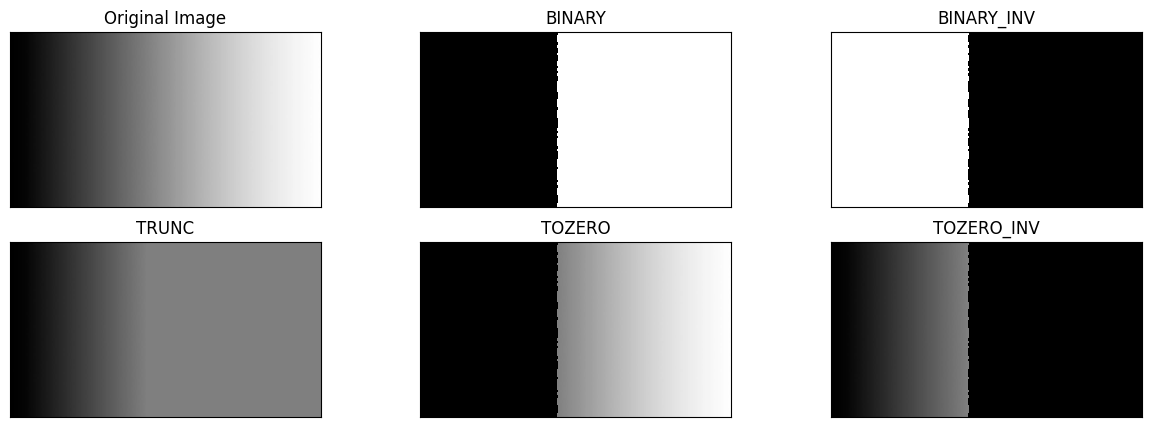

In [54]:
from google.colab.patches import cv2_imshow

filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv2.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv2.threshold(img,thresh,255,cv2.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

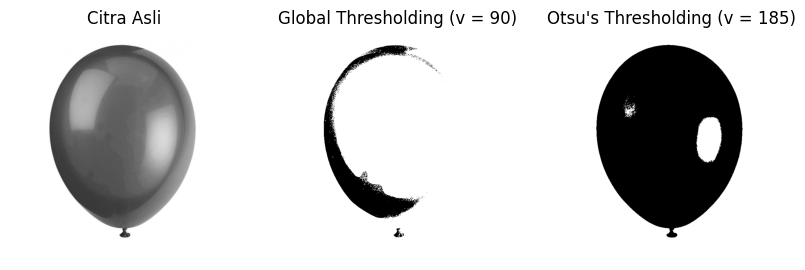

In [55]:
# Fungsi untuk menghitung histogram
def compute_histogram(image):
    histogram = np.zeros(256)
    for value in image.ravel():
        histogram[value] += 1
    return histogram

# Fungsi untuk menghitung Otsu threshold secara manual
def otsu_threshold(image):
    histogram = compute_histogram(image)
    total_pixels = image.size
    sum_all = np.dot(np.arange(256), histogram)

    weight_background = 0
    sum_background = 0
    max_variance = 0
    threshold = 0

    for i in range(256):
        weight_background += histogram[i]
        weight_foreground = total_pixels - weight_background

        if weight_background == 0 or weight_foreground == 0:
            continue

        sum_background += i * histogram[i]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_all - sum_background) / weight_foreground

        # Hitung varian antar kelas
        variance_between = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Simpan threshold terbaik jika varian antar kelas lebih besar
        if variance_between > max_variance:
            max_variance = variance_between
            threshold = i

    return threshold

# Baca gambar balloon.jpg dalam skala abu-abu
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Terapkan threshold Otsu
threshold_value = otsu_threshold(image)

# Terapkan Otsu Thresholding
_, otsu_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Terapkan Global Thresholding dengan nilai tetap v = 90
_, global_thresh_image = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_thresh_image, cmap='gray')
plt.title('Global Thresholding (v = 90)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_image, cmap='gray')
plt.title(f"Otsu's Thresholding (v = {threshold_value})")
plt.axis('off')

plt.show()

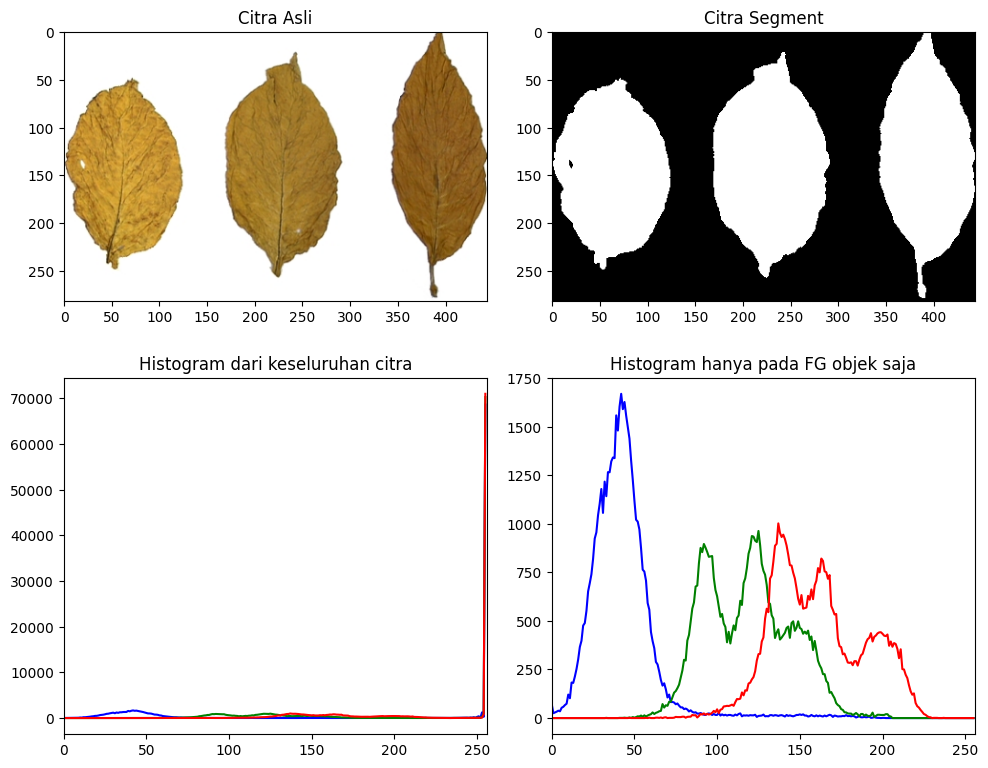

In [56]:
# Baca gambar tobacco.jpg dalam warna
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')

# Ubah ke grayscale untuk thresholding
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Terapkan thresholding untuk segmentasi objek daun
_, mask = cv2.threshold(gray_image, 205, 255, cv2.THRESH_BINARY_INV)

# Hitung histogram keseluruhan citra tanpa mask
hist_full = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]

# Hitung histogram hanya untuk foreground (menggunakan mask)
hist_fg = [cv2.calcHist([image], [i], mask, [256], [0, 256]) for i in range(3)]

# Plot gambar asli dan citra segmentasi
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')

# Plot histogram untuk keseluruhan citra
plt.subplot(2, 2, 3)
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    plt.plot(hist_full[i], color=color)
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# Plot histogram hanya untuk foreground
plt.subplot(2, 2, 4)
for i, color in enumerate(colors):
    plt.plot(hist_fg[i], color=color)
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


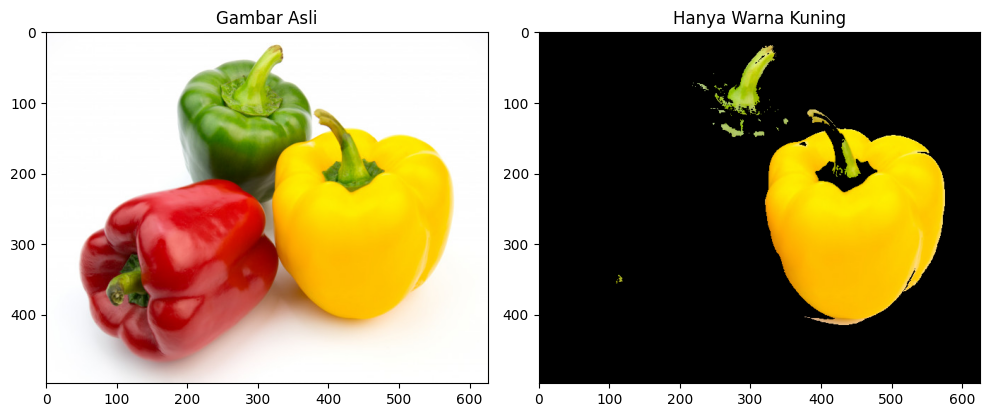

In [57]:
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/peppers.jpg')

# Ubah gambar dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape gambar menjadi array 2D dengan setiap piksel sebagai satu sampel (format (height*width, 3))
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Tentukan jumlah cluster (k)
k = 3  # Jumlah cluster bisa disesuaikan
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Terapkan K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi pusat cluster ke integer 8-bit
centers = np.uint8(centers)

# Ubah label dari setiap piksel ke warna pusat cluster yang sesuai
segmented_image = centers[labels.flatten()]

# Reshape gambar yang sudah tersegmentasi ke bentuk aslinya
segmented_image = segmented_image.reshape(image_rgb.shape)

# Tentukan cluster yang paling mendekati warna kuning
# Nilai RGB untuk warna kuning biasanya mendekati [255, 255, 0] atau [255, 255, 100]
yellow_rgb = np.array([255, 255, 0])

# Hitung jarak Euclidean dari setiap pusat cluster ke warna kuning
distances = np.linalg.norm(centers - yellow_rgb, axis=1)

# Cari cluster yang paling mendekati warna kuning
yellow_cluster = np.argmin(distances)

# Buat mask untuk menampilkan hanya warna kuning
mask = (labels == yellow_cluster).reshape(image_rgb.shape[0], image_rgb.shape[1])

# Terapkan mask ke gambar asli
result = np.zeros_like(image_rgb)
result[mask] = image_rgb[mask]

# Tampilkan gambar asli dan hasilnya
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Hanya Warna Kuning')

plt.tight_layout()
plt.show()

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.

Kendala utama saat menampilkan warna tertentu, seperti kuning, dengan K-Means clustering adalah variasi warna dalam gambar, noise, pencahayaan yang tidak seragam, dan pengelompokan yang tidak selalu akurat. Solusi untuk kendala-kendala ini melibatkan pemilihan jumlah cluster yang tepat, pra-pemrosesan gambar, serta iterasi untuk menemukan konfigurasi yang optimal.

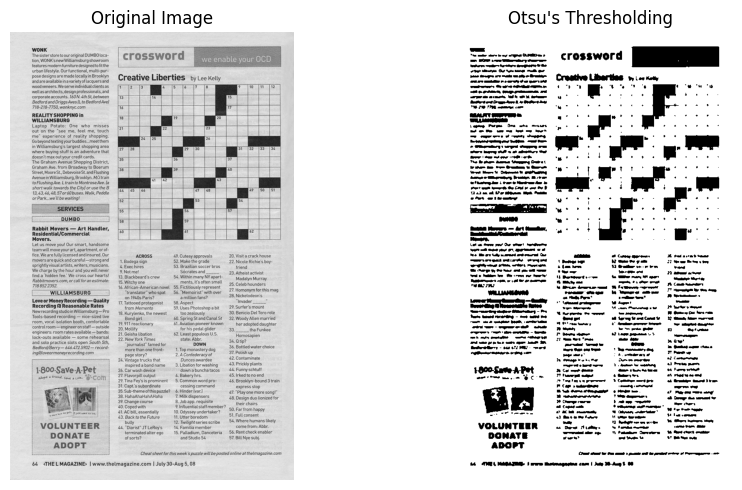

In [58]:
# Load the uploaded crossword image
image_path = "/content/drive/MyDrive/PCVK/Images/crossword.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale image

# Apply GaussianBlur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Otsu's Thresholding
_, otsu_thresh = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original image and the Otsu thresholding result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()